# Data Analysis on Brasilian Congress Voting System

## Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from tabulate import tabulate
import numpy as np
import csv

from groq import Groq
import time
from dotenv import load_dotenv
from tqdm import tqdm

## Importing Data

In [3]:
# Define the folder path
votacoes = 'data/voting/'
votacoesProposicoes = 'data/voting/proposition/'
proposicoes = 'data/propositions'

# Use glob to find all files matching the pattern
votacoes_file_paths = glob.glob(os.path.join(votacoes, 'votacoes-*.csv'))
votacoesProposicoes_file_paths = glob.glob(os.path.join(votacoesProposicoes, 'votacoesProposicoes-*.csv'))
proposicoes_file_paths = glob.glob(os.path.join(proposicoes, 'proposicoes-*.xlsx'))

# Load the orgaos.csv data
orgaos_df = pd.read_csv('data/extra/orgaos.csv', delimiter=';', quotechar='"')

# Load the legislaturas.csv data
legislaturas_df = pd.read_csv('data/extra/legislaturas.csv', delimiter=';', quotechar='"')


In [4]:
# Initialize an empty list to store individual DataFrames
votacoes = []

# Loop through each file path
for file_path in votacoes_file_paths:
    # Extract the year from the file name
    year = os.path.basename(file_path).split('-')[1].split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, delimiter=';', quotechar='"')
    
    # Print the number of rows in the current dataset
    print(f"File: {os.path.basename(file_path)} | Rows: {len(df)}")
    
    # Add a 'year' column to the DataFrame
    df['year'] = int(year)
    
    # Append the DataFrame to the list
    votacoes.append(df)

File: votacoes-2003.csv | Rows: 10128
File: votacoes-2004.csv | Rows: 6783
File: votacoes-2005.csv | Rows: 7298
File: votacoes-2006.csv | Rows: 4777
File: votacoes-2007.csv | Rows: 8006
File: votacoes-2008.csv | Rows: 7187
File: votacoes-2009.csv | Rows: 8896
File: votacoes-2010.csv | Rows: 5422
File: votacoes-2011.csv | Rows: 6268
File: votacoes-2012.csv | Rows: 5434
File: votacoes-2013.csv | Rows: 7256
File: votacoes-2014.csv | Rows: 3525
File: votacoes-2015.csv | Rows: 9987
File: votacoes-2016.csv | Rows: 5525
File: votacoes-2017.csv | Rows: 7392
File: votacoes-2018.csv | Rows: 3991
File: votacoes-2019.csv | Rows: 8720
File: votacoes-2020.csv | Rows: 1493
File: votacoes-2021.csv | Rows: 9998
File: votacoes-2022.csv | Rows: 5579
File: votacoes-2023.csv | Rows: 10910
File: votacoes-2024.csv | Rows: 10452


In [5]:
proposicoes = []

# Loop over the years from 2003 to 2024
for year in range(2003, 2025):
    file_path = f"data/propositions/proposicoes-{year}.xlsx"
    
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Add the 'year' column
    df["year"] = year
    
    # Append to the list of DataFrames
    proposicoes.append(df)

# Concatenate all DataFrames into a single one
proposicoes_df = pd.concat(proposicoes, ignore_index=True)

proposicoes_df.head()

e:\Anaconda\envs\dados_abertos\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Anaconda\envs\dados_abertos\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Anaconda\envs\dados_abertos\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Anaconda\envs\dados_abertos\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Anaconda\envs\dados_abertos\lib\site-packages\openpyxl\styles\stylesheet.py:237: 

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_apreciacao,ultimoStatus_url,year
0,29517,https://dadosabertos.camara.leg.br/api/v2/prop...,SBT,1,0,255,Substitutivo,NaN,NaN,NaN,...,https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Arquivada,923.0,Apresentação do Substitutivo pelo Dep. Vilmar ...,Indefinida,https://www.camara.leg.br/proposicoesWeb/prop_...,2003
1,33173,https://dadosabertos.camara.leg.br/api/v2/prop...,EMR,1,0,257,Emenda de Relator,NaN,NaN,NaN,...,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,Apresentação da Emenda de Relator pelo Dep. Wi...,Indefinida,https://www.camara.leg.br/proposicoesWeb/prop_...,2003
2,33174,https://dadosabertos.camara.leg.br/api/v2/prop...,EMR,2,0,257,Emenda de Relator,NaN,NaN,NaN,...,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,Apresentação da Emenda de Relator pelo Dep. Wi...,Indefinida,https://www.camara.leg.br/proposicoesWeb/prop_...,2003
3,36887,https://dadosabertos.camara.leg.br/api/v2/prop...,SBT,1,0,255,Substitutivo,NaN,NaN,NaN,...,https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Arquivada,923.0,Apresentação do Substitutivo pelo Dep. Bonifác...,Indefinida,https://www.camara.leg.br/proposicoesWeb/prop_...,2003
4,45667,https://dadosabertos.camara.leg.br/api/v2/prop...,SBT,1,0,255,Substitutivo,NaN,NaN,NaN,...,https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Arquivada,923.0,Apresentação do Substitutivo pelo Dep. Zenaldo...,Indefinida,https://www.camara.leg.br/proposicoesWeb/prop_...,2003


In [6]:
# Initialize an empty list to store individual DataFrames
votacoesProposicoes = []

# Loop through each file path
for file_path in votacoesProposicoes_file_paths:
    # Extract the year from the file name
    year = os.path.basename(file_path).split('-')[1].split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, delimiter=';', quotechar='"')
    
    # Print the number of rows in the current dataset
    print(f"File: {os.path.basename(file_path)} | Rows: {len(df)}")
    
    # Add a 'year' column to the DataFrame
    df['year'] = int(year)
    
    # Append the DataFrame to the list
    votacoesProposicoes.append(df)

File: votacoesProposicoes-2003.csv | Rows: 7623
File: votacoesProposicoes-2004.csv | Rows: 5434
File: votacoesProposicoes-2005.csv | Rows: 5602
File: votacoesProposicoes-2006.csv | Rows: 4086
File: votacoesProposicoes-2007.csv | Rows: 5351
File: votacoesProposicoes-2008.csv | Rows: 5447
File: votacoesProposicoes-2009.csv | Rows: 6697
File: votacoesProposicoes-2010.csv | Rows: 4508
File: votacoesProposicoes-2011.csv | Rows: 4169
File: votacoesProposicoes-2012.csv | Rows: 3711
File: votacoesProposicoes-2013.csv | Rows: 4801
File: votacoesProposicoes-2014.csv | Rows: 2373
File: votacoesProposicoes-2015.csv | Rows: 7012
File: votacoesProposicoes-2016.csv | Rows: 4052
File: votacoesProposicoes-2017.csv | Rows: 5245
File: votacoesProposicoes-2018.csv | Rows: 2911
File: votacoesProposicoes-2019.csv | Rows: 5799
File: votacoesProposicoes-2020.csv | Rows: 1434
File: votacoesProposicoes-2021.csv | Rows: 7763
File: votacoesProposicoes-2022.csv | Rows: 4255
File: votacoesProposicoes-2023.csv | Row

## Data Processing

In [7]:
# Concatenate all DataFrames into a single DataFrame
votacoes_df = pd.concat(votacoes, ignore_index=True)

# Display the first few rows of the combined DataFrame
votacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155027 entries, 0 to 155026
Data columns (total 21 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   id                                             155027 non-null  object 
 1   uri                                            155027 non-null  object 
 2   data                                           155027 non-null  object 
 3   dataHoraRegistro                               153538 non-null  object 
 4   idOrgao                                        155027 non-null  int64  
 5   uriOrgao                                       155027 non-null  object 
 6   siglaOrgao                                     155027 non-null  object 
 7   idEvento                                       155027 non-null  int64  
 8   uriEvento                                      147073 non-null  object 
 9   aprovacao                            

In [8]:
votacoes_df = votacoes_df.drop(columns=['uri', 'data', 'dataHoraRegistro', 'uriOrgao', 'idEvento', 'uriEvento', 'ultimaAberturaVotacao_dataHoraRegistro', 'ultimaAberturaVotacao_descricao', 'ultimaApresentacaoProposicao_dataHoraRegistro', 'ultimaApresentacaoProposicao_descricao', 'ultimaApresentacaoProposicao_idProposicao', 'ultimaApresentacaoProposicao_uriProposicao'])

votacoes_df.head()

,id,idOrgao,siglaOrgao,aprovacao,votosSim,votosNao,votosOutros,descricao,year
0,41577-14,4,MESA,1.0,0,0,0,"Aprovação unânime do parecer da Relatora, Dep....",2003
1,96076-49,180,PLEN,1.0,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003
2,98922-29,180,PLEN,1.0,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003
3,102277-6,180,PLEN,1.0,0,0,0,Aprovado requerimento n. 264/2002 de Líderes q...,2003
4,103255-3,180,PLEN,1.0,0,0,0,Aprovado o Requerimento,2003


In [9]:
votacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155027 entries, 0 to 155026
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           155027 non-null  object 
 1   idOrgao      155027 non-null  int64  
 2   siglaOrgao   155027 non-null  object 
 3   aprovacao    154225 non-null  float64
 4   votosSim     155027 non-null  int64  
 5   votosNao     155027 non-null  int64  
 6   votosOutros  155027 non-null  int64  
 7   descricao    155024 non-null  object 
 8   year         155027 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 10.6+ MB


In [10]:
# Filling NA values in 'aprovacao' based on 'descricao'
votacoes_df['aprovacao'] = votacoes_df['aprovacao'].fillna(
    votacoes_df['descricao'].apply(lambda x: 1 if 'Mantid' in str(x) else (0 if 'Suprimid' in str(x) else None))
)

votacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155027 entries, 0 to 155026
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           155027 non-null  object 
 1   idOrgao      155027 non-null  int64  
 2   siglaOrgao   155027 non-null  object 
 3   aprovacao    155027 non-null  float64
 4   votosSim     155027 non-null  int64  
 5   votosNao     155027 non-null  int64  
 6   votosOutros  155027 non-null  int64  
 7   descricao    155024 non-null  object 
 8   year         155027 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 10.6+ MB


In [11]:
votacoes_df['aprovacao'] = votacoes_df['aprovacao'].astype('int64')
votacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155027 entries, 0 to 155026
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           155027 non-null  object
 1   idOrgao      155027 non-null  int64 
 2   siglaOrgao   155027 non-null  object
 3   aprovacao    155027 non-null  int64 
 4   votosSim     155027 non-null  int64 
 5   votosNao     155027 non-null  int64 
 6   votosOutros  155027 non-null  int64 
 7   descricao    155024 non-null  object
 8   year         155027 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 10.6+ MB


In [12]:
orgaos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uri                3699 non-null   object 
 1   sigla              3697 non-null   object 
 2   apelido            3698 non-null   object 
 3   nome               3699 non-null   object 
 4   nomePublicacao     3379 non-null   object 
 5   codTipoOrgao       3699 non-null   int64  
 6   tipoOrgao          3699 non-null   object 
 7   dataInicio         2315 non-null   object 
 8   dataInstalacao     1697 non-null   object 
 9   dataFim            2107 non-null   object 
 10  dataFimOriginal    0 non-null      float64
 11  codSituacao        1699 non-null   float64
 12  descricaoSituacao  1699 non-null   object 
 13  casa               3697 non-null   object 
 14  sala               1004 non-null   object 
 15  urlWebsite         0 non-null      float64
dtypes: float64(3), int64(1),

In [13]:
orgaos_df = orgaos_df.drop(columns=['apelido', 'nomePublicacao', 'codTipoOrgao', 'dataInicio', 'dataInstalacao', 'dataFim', 'dataFimOriginal', 'codSituacao', 'descricaoSituacao', 'casa', 'sala', 'urlWebsite'])

orgaos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uri        3699 non-null   object
 1   sigla      3697 non-null   object
 2   nome       3699 non-null   object
 3   tipoOrgao  3699 non-null   object
dtypes: object(4)
memory usage: 115.7+ KB


In [14]:
# Extract the organ ID from the 'uri' column (e.g., "https://.../orgaos/12345" → 12345)
orgaos_df['id'] = orgaos_df['uri'].str.extract(r'orgaos/(\d+)$').astype(int)

orgaos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uri        3699 non-null   object
 1   sigla      3697 non-null   object
 2   nome       3699 non-null   object
 3   tipoOrgao  3699 non-null   object
 4   id         3699 non-null   int32 
dtypes: int32(1), object(4)
memory usage: 130.2+ KB


In [15]:
orgaos_df = orgaos_df.drop(columns=['uri'])

orgaos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sigla      3697 non-null   object
 1   nome       3699 non-null   object
 2   tipoOrgao  3699 non-null   object
 3   id         3699 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 101.3+ KB


In [16]:
# Merge to add the organ name (nome) to combined_df
votacoes_df = votacoes_df.merge(
    orgaos_df,
    left_on='idOrgao',
    right_on='id',
    how='left'
)

votacoes_df.head()

,id_x,idOrgao,siglaOrgao,aprovacao,votosSim,votosNao,votosOutros,descricao,year,sigla,nome,tipoOrgao,id_y
0,41577-14,4,MESA,1,0,0,0,"Aprovação unânime do parecer da Relatora, Dep....",2003,MESA,Mesa Diretora da Câmara dos Deputados,Comissão Diretora,4.0
1,96076-49,180,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,PLEN,Plenário,Plenário Virtual,180.0
2,98922-29,180,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,PLEN,Plenário,Plenário Virtual,180.0
3,102277-6,180,PLEN,1,0,0,0,Aprovado requerimento n. 264/2002 de Líderes q...,2003,PLEN,Plenário,Plenário Virtual,180.0
4,103255-3,180,PLEN,1,0,0,0,Aprovado o Requerimento,2003,PLEN,Plenário,Plenário Virtual,180.0


In [17]:
votacoes_df = votacoes_df.rename(columns = {'id_x':'idVotacao', 'nome':'nomeOrgao'})

votacoes_df = votacoes_df.drop(columns=['id_y', 'sigla'])

votacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155027 entries, 0 to 155026
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   idVotacao    155027 non-null  object
 1   idOrgao      155027 non-null  int64 
 2   siglaOrgao   155027 non-null  object
 3   aprovacao    155027 non-null  int64 
 4   votosSim     155027 non-null  int64 
 5   votosNao     155027 non-null  int64 
 6   votosOutros  155027 non-null  int64 
 7   descricao    155024 non-null  object
 8   year         155027 non-null  int64 
 9   nomeOrgao    154694 non-null  object
 10  tipoOrgao    154694 non-null  object
dtypes: int64(6), object(5)
memory usage: 13.0+ MB


In [18]:
# Concatenate all DataFrames into a single DataFrame
votacoesProposicoes_df = pd.concat(votacoesProposicoes, ignore_index=True)

# Display the first few rows of the combined DataFrame
votacoesProposicoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114043 entries, 0 to 114042
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   idVotacao             114043 non-null  object 
 1   uriVotacao            114043 non-null  object 
 2   data                  114043 non-null  object 
 3   descricao             114043 non-null  object 
 4   proposicao_id         114043 non-null  int64  
 5   proposicao_uri        114043 non-null  object 
 6   proposicao_titulo     114043 non-null  object 
 7   proposicao_ementa     114026 non-null  object 
 8   proposicao_codTipo    114043 non-null  int64  
 9   proposicao_siglaTipo  114043 non-null  object 
 10  proposicao_numero     114043 non-null  int64  
 11  proposicao_ano        113977 non-null  float64
 12  year                  114043 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 11.3+ MB


In [19]:
votacoesProposicoes_df = votacoesProposicoes_df.drop(columns=['uriVotacao', 'data', 'descricao', 'proposicao_uri', 'proposicao_numero'])

votacoesProposicoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114043 entries, 0 to 114042
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   idVotacao             114043 non-null  object 
 1   proposicao_id         114043 non-null  int64  
 2   proposicao_titulo     114043 non-null  object 
 3   proposicao_ementa     114026 non-null  object 
 4   proposicao_codTipo    114043 non-null  int64  
 5   proposicao_siglaTipo  114043 non-null  object 
 6   proposicao_ano        113977 non-null  float64
 7   year                  114043 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.0+ MB


In [20]:
votacoesProposicoes_df = votacoesProposicoes_df.rename(columns = {'year':'proposicao_ano_arquivo'})

votacoesProposicoes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114043 entries, 0 to 114042
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idVotacao               114043 non-null  object 
 1   proposicao_id           114043 non-null  int64  
 2   proposicao_titulo       114043 non-null  object 
 3   proposicao_ementa       114026 non-null  object 
 4   proposicao_codTipo      114043 non-null  int64  
 5   proposicao_siglaTipo    114043 non-null  object 
 6   proposicao_ano          113977 non-null  float64
 7   proposicao_ano_arquivo  114043 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.0+ MB


In [21]:
proposicoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694509 entries, 0 to 694508
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                694509 non-null  int64  
 1   uri                               694509 non-null  object 
 2   siglaTipo                         694509 non-null  object 
 3   numero                            694509 non-null  int64  
 4   ano                               694509 non-null  int64  
 5   codTipo                           694509 non-null  int64  
 6   descricaoTipo                     694509 non-null  object 
 7   ementa                            663070 non-null  object 
 8   ementaDetalhada                   22722 non-null   object 
 9   keywords                          104402 non-null  object 
 10  dataApresentacao                  694509 non-null  object 
 11  uriOrgaoNumerador                 694509 non-null  o

In [22]:
proposicoes_df = proposicoes_df[['id', 'descricaoTipo','year']]

proposicoes_df

,id,descricaoTipo,year
0,29517,Substitutivo,2003
1,33173,Emenda de Relator,2003
2,33174,Emenda de Relator,2003
3,36887,Substitutivo,2003
4,45667,Substitutivo,2003
...,...,...,...
694504,2482027,Parecer do Relator,2024
694505,2482028,Voto em Separado,2024
694506,2482029,Voto em Separado,2024
694507,2482030,Parecer do Relator,2024


In [23]:
# Create a dictionary from proposicoes_df
year_mapping = dict(zip(proposicoes_df['id'], proposicoes_df['year']))

# Fill missing proposicao_ano by mapping the 'proposicao_id'
# and only using the map result where 'proposicao_ano' is NaN
votacoesProposicoes_df['proposicao_ano'] = votacoesProposicoes_df.apply(
    lambda row: row['proposicao_ano'] if pd.notnull(row['proposicao_ano'])
    else year_mapping.get(row['proposicao_id'], None),
    axis=1
)

votacoesProposicoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114043 entries, 0 to 114042
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idVotacao               114043 non-null  object 
 1   proposicao_id           114043 non-null  int64  
 2   proposicao_titulo       114043 non-null  object 
 3   proposicao_ementa       114026 non-null  object 
 4   proposicao_codTipo      114043 non-null  int64  
 5   proposicao_siglaTipo    114043 non-null  object 
 6   proposicao_ano          114041 non-null  float64
 7   proposicao_ano_arquivo  114043 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.0+ MB


In [24]:
votacoesProposicoes_df[votacoesProposicoes_df['proposicao_ano'].isnull()]

,idVotacao,proposicao_id,proposicao_titulo,proposicao_ementa,proposicao_codTipo,proposicao_siglaTipo,proposicao_ano,proposicao_ano_arquivo
3058,117476-4,29629,PAR 1 CTASP => PL 3384/2000,Aprovado por Unanimidade o Parecer. \r\nParece...,187,PAR,NaN,2003
4549,134214-2,130292,PRL 1 CDU.,"Parecer do Relator, Dep. Barbosa Neto, pela ap...",190,PRL,NaN,2003


The null values in year are not relevant, once we will look only for PL type

In [25]:
# Keep only the columns of interest in votacoes_df
votacoes_df_filtered = votacoes_df[[
    'idVotacao', 'siglaOrgao', 'aprovacao', 'votosSim', 
    'votosNao', 'votosOutros', 'descricao', 'year', 
    'nomeOrgao', 'tipoOrgao'
]]

# Keep only the columns of interest in votacoesProposicoes_df
votacoesProposicoes_df_filtered = votacoesProposicoes_df[[
    'idVotacao', 'proposicao_id', 'proposicao_titulo', 
    'proposicao_ementa', 'proposicao_siglaTipo', 
    'proposicao_ano', 'proposicao_ano_arquivo'
]]

# Merge on the 'idVotacao' column.
# 'how' can be 'inner', 'left', 'right', or 'outer'.
# Use 'inner' if you only want matching rows,
# or 'left' if you want all rows from votacoes_df plus matches from votacoesProposicoes_df, etc.
votacoes_total_df = pd.merge(
    votacoes_df_filtered,
    votacoesProposicoes_df_filtered,
    on='idVotacao',
    how='left'  # or 'left', depending on your needs
)

votacoes_total_df

,idVotacao,siglaOrgao,aprovacao,votosSim,votosNao,votosOutros,descricao,year,nomeOrgao,tipoOrgao,proposicao_id,proposicao_titulo,proposicao_ementa,proposicao_siglaTipo,proposicao_ano,proposicao_ano_arquivo
0,41577-14,MESA,1,0,0,0,"Aprovação unânime do parecer da Relatora, Dep....",2003,Mesa Diretora da Câmara dos Deputados,Comissão Diretora,NaN,NaN,NaN,NaN,NaN,NaN
1,96076-49,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,96076.0,PL 7262/2002,Dispõe sobre o Estatuto de Defesa do Torcedor ...,PL,2002.0,2003.0
2,98922-29,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,98922.0,MPV 78/2002,Autoriza o Poder Executivo a doar à República ...,MPV,2002.0,2003.0
3,102277-6,PLEN,1,0,0,0,Aprovado requerimento n. 264/2002 de Líderes q...,2003,Plenário,Plenário Virtual,102277.0,PDC 2659/2002,Disciplina as relações jurídicas decorrentes d...,PDC,2002.0,2003.0
4,103255-3,PLEN,1,0,0,0,Aprovado o Requerimento,2003,Plenário,Plenário Virtual,102277.0,PDC 2659/2002,Disciplina as relações jurídicas decorrentes d...,PDC,2002.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157155,2266496-54,CCJC,0,0,0,0,Apresentação do VTS n. 1 CCJC (Voto em Separad...,2024,Comissão de Constituição e Justiça e de Cidadania,Comissão Permanente,2266496.0,PL 5451/2020,"Altera a Lei nº 8.078, de 11 de setembro de 19...",PL,2020.0,2024.0
157156,2275427-36,CSAUDE,0,0,0,0,Apresentação do VTS n. 1 CSAUDE (Voto em Separ...,2024,Comissão de Saúde,Comissão Permanente,2275427.0,PL 1065/2021,Institui o projeto UPA Solidária e dá outras p...,PL,2021.0,2024.0
157157,2455796-34,CSAUDE,0,0,0,0,Apresentação do VTS n. 1 CSAUDE (Voto em Separ...,2024,Comissão de Saúde,Comissão Permanente,2455796.0,PL 3355/2024,Dispõe sobre a obrigatoriedade das empresas op...,PL,2024.0,2024.0
157158,2454233-21,CCULT,0,0,0,0,Apresentação do VTS n. 1 CCULT (Voto em Separa...,2024,Comissão de Cultura,Comissão Permanente,2454233.0,PL 3245/2024,"Dispõe sobre o selo “Cidade Amiga da Cultura”,...",PL,2024.0,2024.0


## Analysing Data

### Voting By siglaOrgao

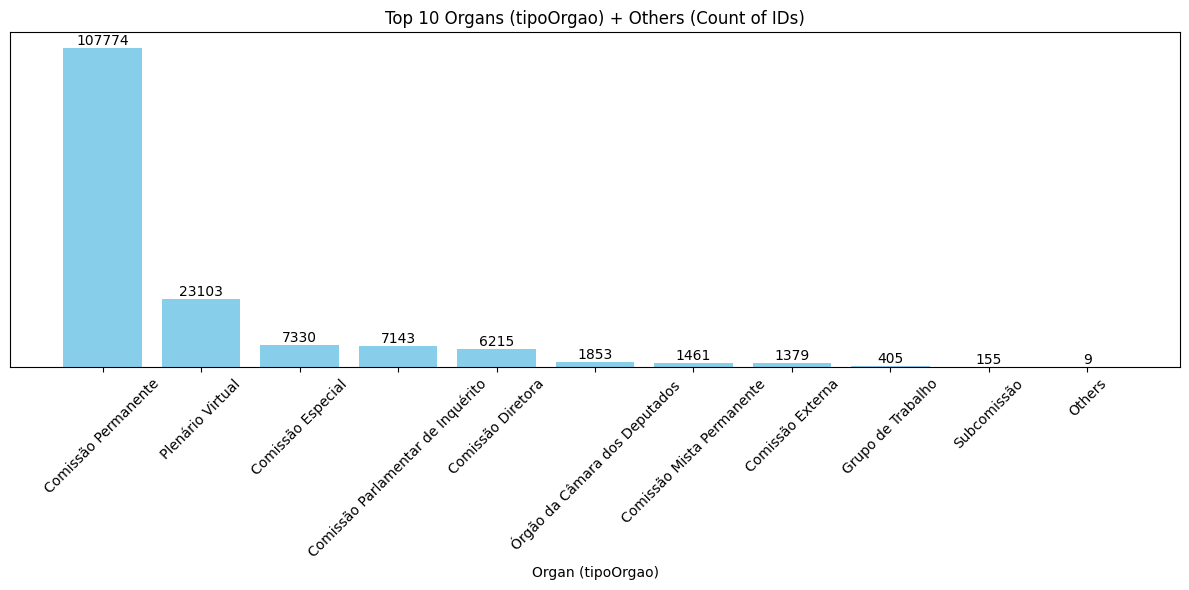

In [26]:
# Group by 'siglaOrgao' and count IDs
votacoes_grouped = votacoes_total_df.groupby('tipoOrgao')['idVotacao'].count().reset_index(name='count')

# Sort by count and split into top 10 + others
votacoes_grouped = votacoes_grouped.sort_values(by='count', ascending=False).reset_index(drop=True)
top_10 = votacoes_grouped.head(10)
others_count = votacoes_grouped['count'][10:].sum()
others_row = pd.DataFrame({'tipoOrgao': ['Others'], 'count': [others_count]})

# Combine into final data for the chart
votacoes_grouped = pd.concat([top_10, others_row], ignore_index=True)

plt.figure(figsize=(12, 6))

# Create the bar chart
bars = plt.bar(
    votacoes_grouped['tipoOrgao'], 
    votacoes_grouped['count'], 
    color='skyblue'
)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X-position: center of the bar
        height,                            # Y-position: at the top of the bar
        f'{height}',                       # Text: the height (count)
        ha='center', 
        va='bottom'
    )

# Title and X-label
plt.title('Top 10 Organs (tipoOrgao) + Others (Count of IDs)')
plt.xlabel('Organ (tipoOrgao)')

# Remove the y-axis label/ticks
plt.ylabel('')
plt.yticks([])

# Remove the grid
plt.grid(False)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Fit layout nicely
plt.tight_layout()
plt.show()

### Voting in PLEN by year

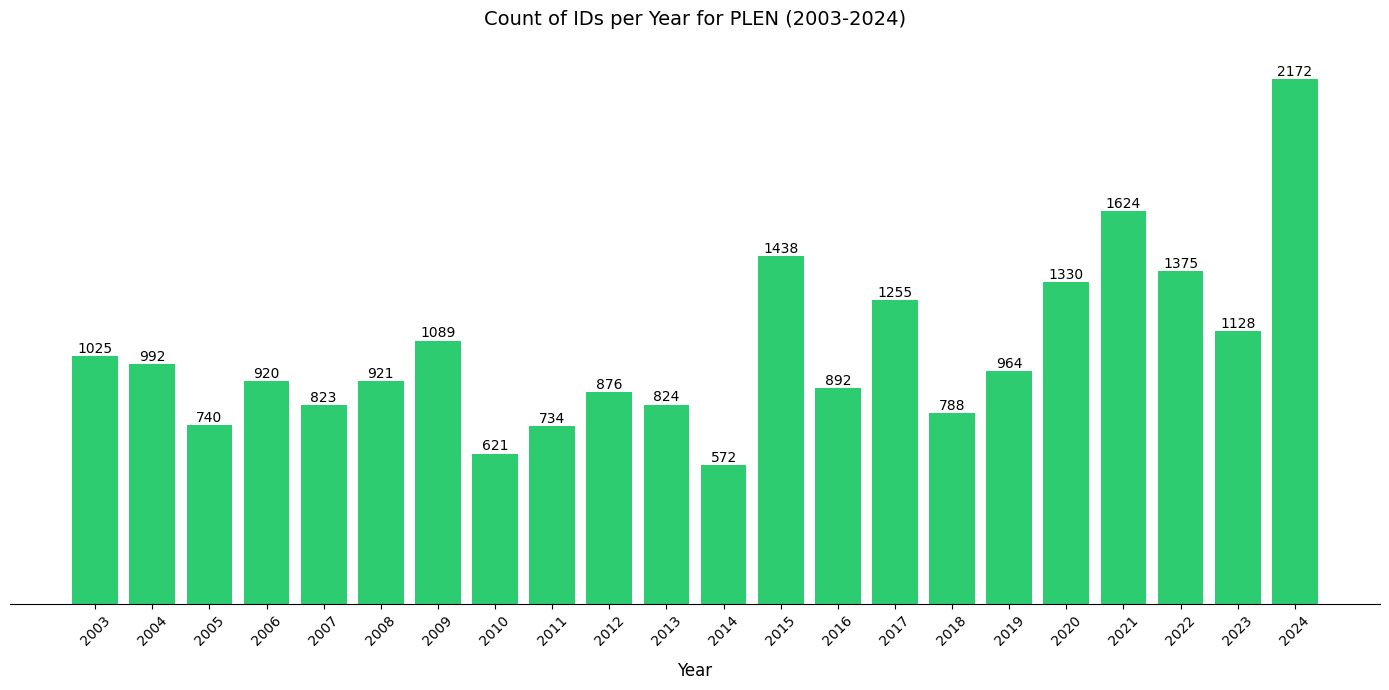

In [27]:
# Filter data for 'PLEN' and years 2003-2024
voting_plen_df = votacoes_total_df[
    (votacoes_total_df['tipoOrgao'] == 'Plenário Virtual')
]

# Group by year and count IDs
yearly_counts = voting_plen_df.groupby('year')['idVotacao'].count().reset_index(name='count')

# Ensure all years from 2003-2024 are included (even if count=0)
all_years = pd.DataFrame({'year': range(2003, 2025)})  # 2025 is exclusive, so 2003-2024
yearly_counts = all_years.merge(yearly_counts, on='year', how='left').fillna(0)

# Plot the bar chart with data labels
plt.figure(figsize=(14, 7))
bars = plt.bar(yearly_counts['year'], yearly_counts['count'], color='#2ecc71')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Only label bars with height > 0
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{int(height)}',  # Display integer values
            ha='center',
            va='bottom',
            fontsize=10
        )

# Customize the chart
plt.title('Count of IDs per Year for PLEN (2003-2024)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.xticks(yearly_counts['year'], rotation=45, fontsize=10)

# Remove y-axis, grid, and spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()

### Propositions by Type

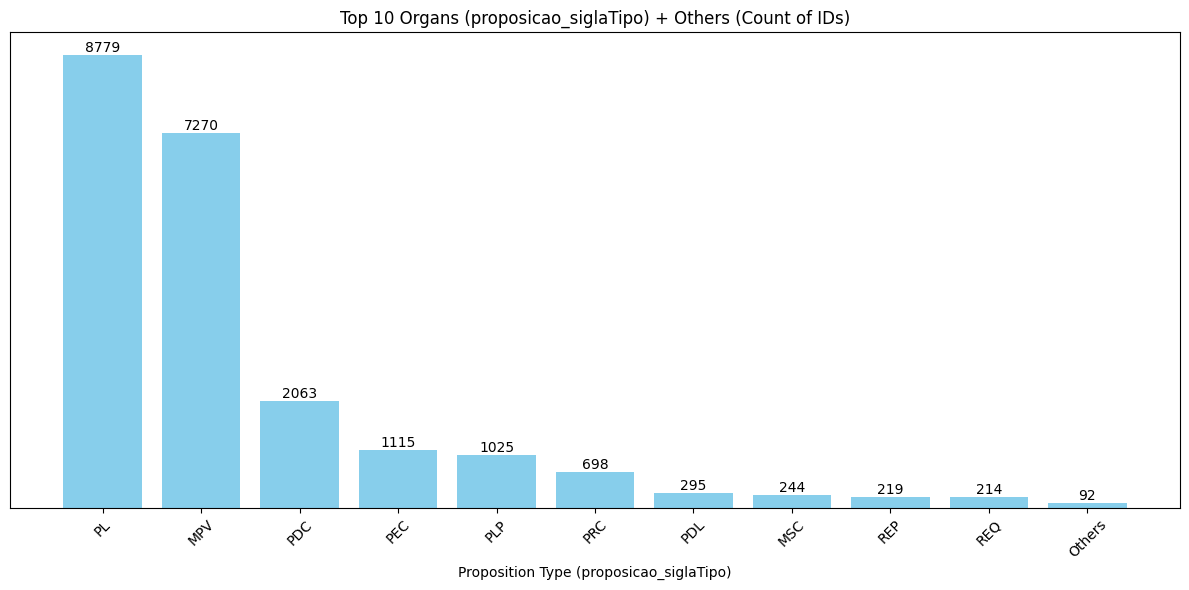

In [28]:
# Group by 'siglaOrgao' and count IDs
votacoes_grouped_prop_type = voting_plen_df.groupby('proposicao_siglaTipo')['idVotacao'].count().reset_index(name='count')

# Sort by count and split into top 10 + others
votacoes_grouped_prop_type = votacoes_grouped_prop_type.sort_values(by='count', ascending=False).reset_index(drop=True)
top_10 = votacoes_grouped_prop_type.head(10)
others_count = votacoes_grouped_prop_type['count'][10:].sum()
others_row = pd.DataFrame({'proposicao_siglaTipo': ['Others'], 'count': [others_count]})

# Combine into final data for the chart
votacoes_grouped_prop_type = pd.concat([top_10, others_row], ignore_index=True)

plt.figure(figsize=(12, 6))

# Create the bar chart
bars = plt.bar(
    votacoes_grouped_prop_type['proposicao_siglaTipo'], 
    votacoes_grouped_prop_type['count'], 
    color='skyblue'
)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X-position: center of the bar
        height,                            # Y-position: at the top of the bar
        f'{height}',                       # Text: the height (count)
        ha='center', 
        va='bottom'
    )

# Title and X-label
plt.title('Top 10 Organs (proposicao_siglaTipo) + Others (Count of IDs)')
plt.xlabel('Proposition Type (proposicao_siglaTipo)')

# Remove the y-axis label/ticks
plt.ylabel('')
plt.yticks([])

# Remove the grid
plt.grid(False)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Fit layout nicely
plt.tight_layout()
plt.show()

### PL Analysis

C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_34332\2074025120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voting_plen_selected_df['has_votes'] = (


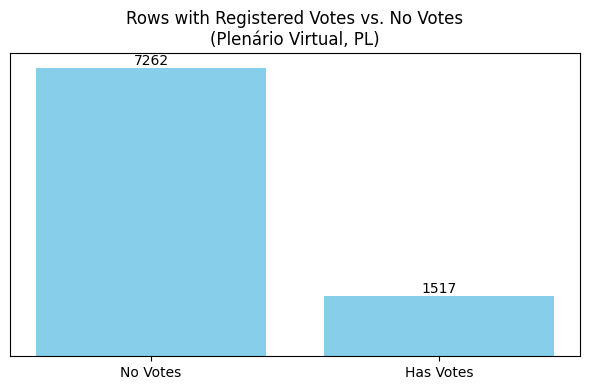

In [29]:
voting_plen_selected_df = votacoes_total_df[(votacoes_total_df['tipoOrgao'] == 'Plenário Virtual') & (votacoes_total_df['proposicao_siglaTipo'] == 'PL')]

# Step 1: Create a boolean column indicating if a row has any votes
voting_plen_selected_df['has_votes'] = (
    voting_plen_selected_df[['votosSim', 'votosNao', 'votosOutros']]
    .fillna(0)
    .sum(axis=1) > 0
)

# Step 2: Calculate counts of True/False
counts = voting_plen_selected_df['has_votes'].value_counts()

# Prepare labels in the right order: False (index 0), True (index 1)
# or use .reindex() if you need a specific order
labels = ['No Votes', 'Has Votes']
# Match these labels to the counts: index=False->0, index=True->1
values = [counts.get(False, 0), counts.get(True, 0)]

# Step 3: Plot with the same style
plt.figure(figsize=(6, 4))

# Plot bars
bars = plt.bar(labels, values, color='skyblue')

# Place data labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height}',
        ha='center', 
        va='bottom'
    )

# Title
plt.title('Rows with Registered Votes vs. No Votes\n(Plenário Virtual, PL)')

# Remove y-axis label and ticks
plt.ylabel('')
plt.yticks([])

# Remove grid
plt.grid(False)

plt.tight_layout()
plt.show()

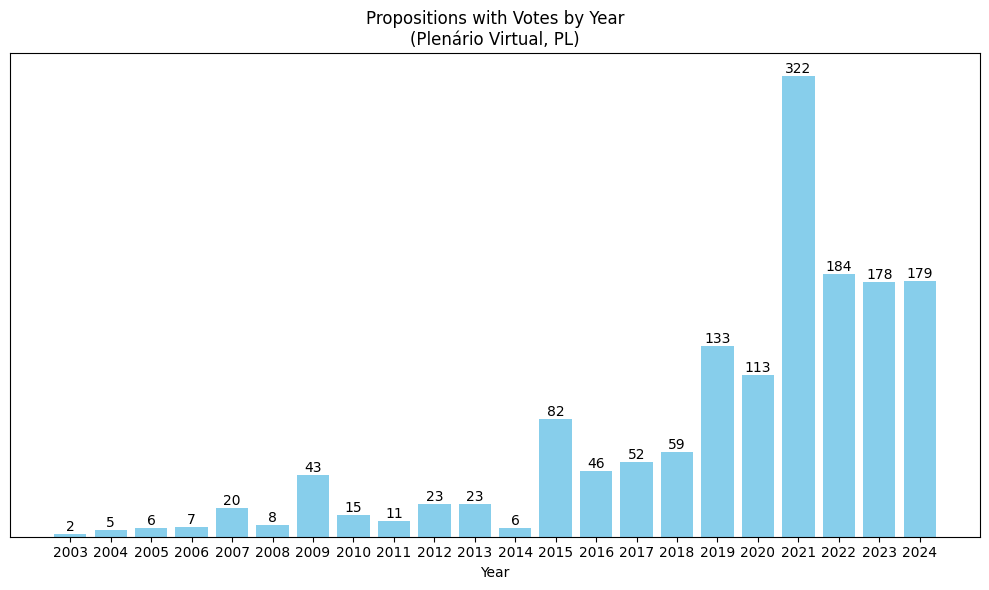

In [30]:
# 2. Filter only the rows that have votes
has_votes_df = voting_plen_selected_df[voting_plen_selected_df['has_votes'] == True]

# 3. Group by year to get the count of propositions that have votes
counts_by_year = has_votes_df['year'].value_counts().sort_index()

# 4. Plot the bar chart
plt.figure(figsize=(10, 6))

# We turn the index (the years) into strings on the x-axis
bars = plt.bar(counts_by_year.index.astype(str), counts_by_year.values, color='skyblue')

# 5. Place data labels (counts) above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )

# 6. Style the chart
plt.title('Propositions with Votes by Year\n(Plenário Virtual, PL)')
plt.xlabel('Year')
plt.ylabel('')         # Remove y-axis label
plt.yticks([])         # Remove y-axis ticks
plt.grid(False)        # Remove grid
plt.tight_layout()

plt.show()

In [31]:
voting_plen_selected_df

,idVotacao,siglaOrgao,aprovacao,votosSim,votosNao,votosOutros,descricao,year,nomeOrgao,tipoOrgao,proposicao_id,proposicao_titulo,proposicao_ementa,proposicao_siglaTipo,proposicao_ano,proposicao_ano_arquivo,has_votes
1,96076-49,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,96076.0,PL 7262/2002,Dispõe sobre o Estatuto de Defesa do Torcedor ...,PL,2002.0,2003.0,False
5,96076-46,PLEN,1,0,0,0,Aprovado o Substitutivo oferecido pelo Relator...,2003,Plenário,Plenário Virtual,96076.0,PL 7262/2002,Dispõe sobre o Estatuto de Defesa do Torcedor ...,PL,2002.0,2003.0,False
22,19408-72,PLEN,1,0,0,0,Aprovado o Requerimento do Sr. Dep. José Carlo...,2003,Plenário,Plenário Virtual,19408.0,PL 3285/1992,Dispõe sobre a utilização e proteção da Mata A...,PL,1992.0,2003.0,False
23,21283-45,PLEN,1,0,0,0,Aprovado o Requerimento do Sr. Dep. Mendes Rib...,2003,Plenário,Plenário Virtual,21283.0,PL 6132/1990,Dispõe sobre o registro de pessoas fisicas ou ...,PL,1990.0,2003.0,False
24,90170-30,PLEN,1,0,0,0,"Aprovado requerimento do Líderes que requer, n...",2003,Plenário,Plenário Virtual,90170.0,PL 7241/2002,Dispõe sobre a alienação por doação de uma Cor...,PL,2002.0,2003.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157149,2473375-78,PLEN,1,277,174,2,Mantido o texto. Sim: 277; Não: 174; Abstenção...,2024,Plenário,Plenário Virtual,2473375.0,PL 4614/2024,"Altera a Lei nº 8.171, de 17 de janeiro de 199...",PL,2024.0,2024.0,True
157150,2473375-80,PLEN,1,0,0,0,Aprovada a Redação Final assinada pelo relator...,2024,Plenário,Plenário Virtual,2473375.0,PL 4614/2024,"Altera a Lei nº 8.171, de 17 de janeiro de 199...",PL,2024.0,2024.0,False
157151,2460010-35,PLEN,0,82,193,1,Rejeitado o Requerimento. Sim: 82; Não: 193; T...,2024,Plenário,Plenário Virtual,2460010.0,PL 3802/2024,"Altera a Lei nº 14.467, de 16 de novembro de 2...",PL,2024.0,2024.0,True
157152,2460010-43,PLEN,1,340,117,2,"Aprovado o Projeto de Lei nº 3.802, de 2024. S...",2024,Plenário,Plenário Virtual,2460010.0,PL 3802/2024,"Altera a Lei nº 14.467, de 16 de novembro de 2...",PL,2024.0,2024.0,True


In [32]:
# Initialize a list to collect DataFrames for each year
votes_deputies_list = []

# Get the unique years from the voting_plen_selected_df dataset
unique_years = voting_plen_selected_df['year'].unique()
print(f"Found years: {unique_years}")

# Loop over each unique year to process the respective CSV file
for year in unique_years:
    print(f"\nProcessing year: {year}")
    
    # Construct the file path for the current year
    file_path = f"data/voting/votes/votacoesVotos-{year}.csv"
    print(f"Loading file: {file_path}")
    
    # Try to load the CSV file
    try:
        votes_year_df = pd.read_csv(file_path, delimiter=';', quotechar='"')
        print(f"Successfully loaded {file_path} with {len(votes_year_df)} rows.")
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        continue  # Skip this year if there's an error

    # Get the list of idVotacao values for this year from voting_plen_selected_df
    id_list = voting_plen_selected_df.loc[
        voting_plen_selected_df['year'] == year, 'idVotacao'
    ].unique()
    print(f"Found {len(id_list)} unique 'idVotacao' values for year {year}.")

    # Filter the votes dataframe to only include rows with idVotacao in id_list
    filtered_votes_df = votes_year_df[votes_year_df['idVotacao'].isin(id_list)]
    print(f"After filtering, {len(filtered_votes_df)} rows remain for year {year}.")

    # Add a new column 'year' to the filtered DataFrame
    filtered_votes_df = filtered_votes_df.assign(year=year)
    
    # Append the filtered DataFrame to the list
    votes_deputies_list.append(filtered_votes_df)

# Concatenate all the filtered DataFrames into a single DataFrame
votes_deputies_df = pd.concat(votes_deputies_list, ignore_index=True)
print(f"\nFinal concatenated DataFrame 'votes_deputies_df' contains {len(votes_deputies_df)} rows.")

Found years: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 2024]

Processing year: 2003
Loading file: data/voting/votes/votacoesVotos-2003.csv
Successfully loaded data/voting/votes/votacoesVotos-2003.csv with 12380 rows.
Found 350 unique 'idVotacao' values for year 2003.
After filtering, 708 rows remain for year 2003.

Processing year: 2004
Loading file: data/voting/votes/votacoesVotos-2004.csv
Successfully loaded data/voting/votes/votacoesVotos-2004.csv with 24903 rows.
Found 184 unique 'idVotacao' values for year 2004.
After filtering, 1637 rows remain for year 2004.

Processing year: 2005
Loading file: data/voting/votes/votacoesVotos-2005.csv
Successfully loaded data/voting/votes/votacoesVotos-2005.csv with 17455 rows.
Found 173 unique 'idVotacao' values for year 2005.
After filtering, 2127 rows remain for year 2005.

Processing year: 2006
Loading file: data/voting/votes/votacoesVotos-2006.csv
Successfully loaded data/voti

In [33]:
votes_deputies_df

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto,year
0,143282-5,https://dadosabertos.camara.leg.br/api/v2/vota...,2003-11-18T19:02:33,Não,73764.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abelardo Lupion,PFL,https://dadosabertos.camara.leg.br/api/v2/part...,PR,52,https://www.camara.leg.br/internet/deputado/ba...,2003
1,143282-5,https://dadosabertos.camara.leg.br/api/v2/vota...,2003-11-18T19:09:55,Sim,73886.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Adão Pretto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,RS,52,https://www.camara.leg.br/internet/deputado/ba...,2003
2,143282-5,https://dadosabertos.camara.leg.br/api/v2/vota...,2003-11-18T18:58:01,Não,73765.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Affonso Camargo,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,PR,52,https://www.camara.leg.br/internet/deputado/ba...,2003
3,143282-5,https://dadosabertos.camara.leg.br/api/v2/vota...,2003-11-18T18:57:59,Sim,74358.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Agnaldo Muniz,PPS,https://dadosabertos.camara.leg.br/api/v2/part...,RO,52,https://www.camara.leg.br/internet/deputado/ba...,2003
4,143282-5,https://dadosabertos.camara.leg.br/api/v2/vota...,2003-11-18T19:04:07,Sim,73457.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Airton Roveda,PMDB,https://dadosabertos.camara.leg.br/api/v2/part...,PR,52,https://www.camara.leg.br/internet/deputado/ba...,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587438,565397-185,https://dadosabertos.camara.leg.br/api/v2/vota...,2024-10-16T19:58:10,Sim,220536.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Haroldo Cathedral,PSD,https://dadosabertos.camara.leg.br/api/v2/part...,RR,57,https://www.camara.leg.br/internet/deputado/ba...,2024
587439,565397-185,https://dadosabertos.camara.leg.br/api/v2/vota...,2024-10-16T20:00:02,Não,160632.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Silva,SOLIDARIEDADE,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,2024
587440,565397-185,https://dadosabertos.camara.leg.br/api/v2/vota...,2024-10-16T19:59:56,Não,204517.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,2024
587441,565397-185,https://dadosabertos.camara.leg.br/api/v2/vota...,2024-10-16T19:59:29,Não,220592.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,2024


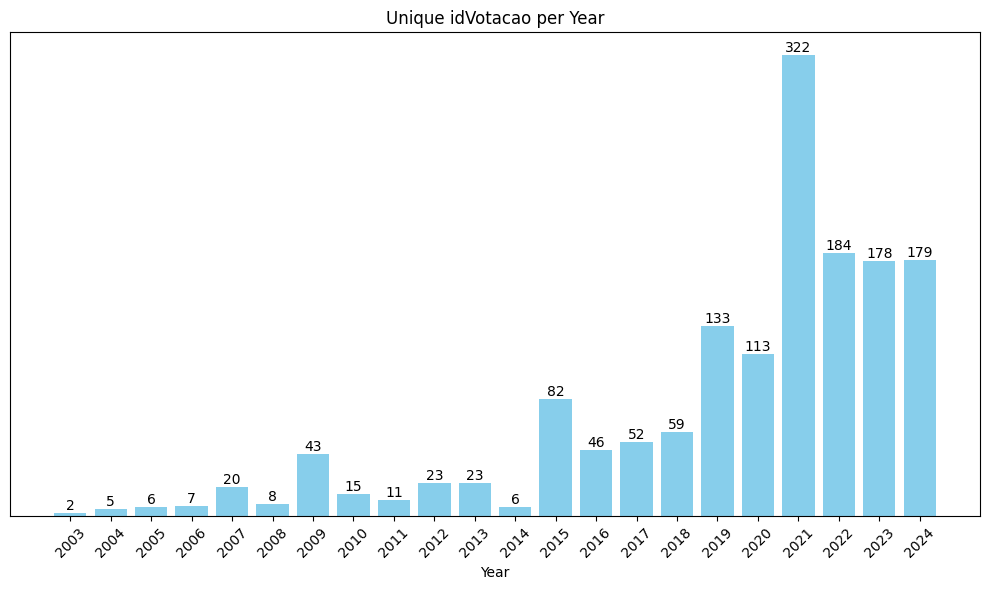

In [34]:
# Group the data by the new 'year' column and count unique 'idVotacao' values per year
unique_id_counts = votes_deputies_df.groupby('year')['idVotacao'].nunique()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_id_counts.index.astype(str), unique_id_counts.values, color='skyblue')

# Annotate each bar with the unique count value (displaying the value above each bar)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height,                            # Position at the top of the bar
        f'{int(height)}',                  # Text label
        ha='center',                       # Center horizontally
        va='bottom'                        # Place text just above the bar
    )

# Rotate the x-axis tick labels by 45 degrees for better visibility
plt.xticks(rotation=45)

# Remove the y-axis and grid lines for a cleaner look
plt.gca().axes.get_yaxis().set_visible(False)
plt.grid(False)

# Add title and x-axis label
plt.title('Unique idVotacao per Year')
plt.xlabel('Year')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
voting_plen_selected_df['descricao'].head(30)

1      Aprovada a Redação Final oferecida pelo Relato...
5      Aprovado o Substitutivo oferecido pelo Relator...
22     Aprovado o Requerimento do Sr. Dep. José Carlo...
23     Aprovado o Requerimento do Sr. Dep. Mendes Rib...
24     Aprovado requerimento do Líderes que requer, n...
30     Aprovado o Requerimento do Sr. Dep. Sarney Fil...
38                                              Aprovado
42     Aprovada a Redação Final oferecida pelo Relato...
44     Aprovado Requerimento do Sr. Dep. Wilson Santo...
47                             Aprovado o Projeto de Lei
196    Aprovado REQ 450/2003 do Sr. Maurício Rabelo q...
197                              Aprovado o Requerimento
198                              Aprovado o Requerimento
200                              Aprovado o Requerimento
201    Aprovado requerimento n. 457/2003 do Sr. Maurí...
202    Aprovado requerimento n. 455/2003 do Sr. Luiz ...
346                            Rejeitado o Requerimento.
357    Aprovada a Redação Final

In [36]:
# Extract unique values from the 'descricao' column
unique_descriptions = voting_plen_selected_df['descricao'].unique()

# Convert the unique values into a DataFrame
unique_descriptions_df = pd.DataFrame(unique_descriptions, columns=['descricao'])

# Optional: Sort the descriptions for better readability
unique_descriptions_df = unique_descriptions_df.sort_values('descricao')

# Export the DataFrame to a CSV file without the index
output_file = 'unique_descriptions.csv'
unique_descriptions_df.to_csv(output_file, index=False)

print(f"Unique descriptions have been exported to '{output_file}'")

Unique descriptions have been exported to 'unique_descriptions.csv'


In [37]:
def categorize_description(text):
    # Ensure the text is a string (handle NaN or non-string values)
    if not isinstance(text, str):
        return "Other", None

    # Convert text to lowercase to ignore case differences
    text_lower = text.lower()
    
    # --- Proposition Approval ---
    proposition_phrases = [
        "aprovado o projeto",
        "aprovado o pl",
        "aprovado o §",
        "votação do §",
        "aprovado este projeto",
        "aprovado o texto",
        "restabelecido o texto",
        "mantido o texto",
        "mantido texto",
        "suprimido o texto",
        "suprimidos os artigos destacados",
        "aprovada a supressão",
        "aprovado a redação", # ok
        "aprovada a redação", # ok
        "mantido o dispositivo",
        "aprovado o dispositivo",
        "aprovados os dispositivos",
        "mantido o §",
        "rejeitado o dispositivo",
        "mantido o artigo",
        "aprovado o art",
        "mantido o  artigo",
        "aprovados os artigos",
        "aprovado o recurso",
        "rejeitada a supressão",
        "não acolhido pela mesa o destaque",
        "rejeitado o projeto",
        "rejeitado este projeto",
        "rejeitado o texto",
        "rejeitado a redação", # ok
        "rejeitada a redação", # ok
        "suprimido o dispositivo",
        "rejeitados os artigos",
        "mantidos os artigos",
        "rejeitado o art",
        "suprimido o art",
        "rejeitados o art",
        "rejeitado o recurso",
        "rejeição do recurso",
        "suprimidos o texto",
        "rejeitados os dispositivos constantes",
        "mantidos os dispositivos",
        "suprimidos os dispositivos",
        "rejeitada a alínea",
        "rejeitada a apreciação",
        "aprovado o ofício"
    ]
    for phrase in proposition_phrases:
        if phrase in text_lower:
            return "Proposition Approval", phrase

    # --- Text Editing ---
    text_editing_phrases = [
        "aprovado o substitutivo",
        "aprovada a substituição",
        "rejeitado o substitutivo",
        "rejeitado os dispositivos do substitutivo",
        "rejeitados os dispositivos do substitutivo",
        "rejeitada a substituição",
        "aprovado a emenda substitutiva",
        "emenda aglutinativa substitutiva",
        "rejeitadas as alterações",
        "aprovada a emenda",
        "aprovada a  emenda",
        "aprovados a ementa",
        "aprovada a parte da emenda",
        "aprovada emenda",
        "aprovadas as emendas",
        "aprovadas as  emendas",
        "aprovação das emendas",
        "aprovadas das emendas",
        "aprovadas as emenda",
        "aprovada as emendas",
        "aprovadas, em globo, as emendas",
        "aprovadas em globo as emendas",
        "mantida a parte da emenda",
        "rejeitada a emenda",
        "rejeitada emenda",
        "não acolhida pela mesa a emenda",
        "rejeitada a a emenda",
        "suprimida a emenda",
        "rejeitada as emendas",
        "rejeitadas, em globo, as emendas",
        "rejeitadas em globo as emendas",
        "rejeitada a parte da emenda",
        "rejeitadas a emenda",
        "rejeitas as emendas",
        "rejeitados a emenda",
        "rejeitado a emenda",
        "rejeitadas as emendas",
        "as emendas de redação",
        "rejeitadas  as emendas",
        "rejeitadas as emenda",
        "rejeitada a subemenda",
        "aprovada a subemenda",
        "aprovada, por unanimidade, a subemenda",
        "aprovada a subemeda",
        "aprovada  a subemenda",
        "aprovada a  subemenda",
        "aprovada a submenda",
        "aprovado a subemenda",
        "aprovadas as subemendas",
        "rejeitadas as subemendas",
        "rejeitadas, em globo, as subemendas",
        "rejeitada a submenda",
        "mantido o inciso",
        "suprimido o inciso",
        "rejeitados os incisos",
        "mantida a expressão",
        "aprovada a expressão",
        "rejeitada a expressão",
        "suprimida a expressão",
        "mantida a  expressão",
        "mantidas as expressões",
        "mantido o parágrafo",
        "rejeitado o parágrafo",
        "revogação do referido art",
        "acrescentado o dispositivo"
    ]
    for phrase in text_editing_phrases:
        if phrase in text_lower:
            return "Text Editing", phrase

    # --- Procedural Vote ---
    procedural_phrases = [
        #"aprovado requerimento",
        #"aprovação do requerimento",
        #"aprovado req",
        #"aprovado o req",
        #"aprovação do req",
        "apresentação do req",
        #"o requerimento",
        #"indeferido requerimento",
        #"rejeitada a proposta",
        
        "aprovado, por unanimidade, requerimento",
        #"alteração do regime",
        "aprovado destaque",
        "aprovado o destaque",
        "aprovado o dtq",
        "rejeitado destaque",
        "rejeitada a admissibilidade dos destaques",
        "rejeitado o destaque",
        "rejeitado o detaque",
        #"rejeitados em globo os destaques",
        "admissibilidade dos destaques",
        "rejeitado o dtq",
        "rejeitada a admissibilidade",
        #"rejeitados, em globo, os requerimentos",
        #"rejeitados em globo os requerimentos",
        "aprovada a preferência",
        "para que possa tramitar",
        "rejeitada a concessão do efeito",
        "solicita a revisão",
        "substittutivo da comissão",
        "encaminhamento"
    ]
    for phrase in procedural_phrases:
        if phrase in text_lower:
            return "Procedural Vote", phrase

    # --- Change in Agenda ---
    agenda_phrases = [
        "modificação na ordem do dia",
        "modificações na ordem do dia",
        "rejeitada a preferência",
        "retirada de pauta",
        "para que a votação seja"
    ]
    for phrase in agenda_phrases:
        if phrase in text_lower:
            return "Change in Agenda", phrase
        
    # --- Urgency Request ---
    urgency_phrases = [
        "requerimento de urgência",
        "aprovada a urgência",
        "urgência para apreciação do Projeto",
        "urgência para este projeto",
        "aprovada por unanimidade a urgência",
        "aprovada a requerimento de urgência",
        "aprovada a urgencia",
        "aprovado a urgência",
        "urgência para o pl"
    ]
    for phrase in urgency_phrases:
        if phrase in text_lower:
            return "Urgency Request", phrase
        
    # --- Project Removal ---
    removal_phrases = [
        "aprovada a mensagem"
    ]
    for phrase in removal_phrases:
        if phrase in text_lower:
            return "Project Removal", phrase
        
    # --- Highlight Request / Destaque ---
    highlight_phrases = [
        "requerimentos de destaques"
    ]
    for phrase in highlight_phrases:
        if phrase in text_lower:
            return "Highlight Requests", phrase
        
    # --- Unite Propositions / Apensação ---
    unite_phrases = [
        "apensação"
    ]
    for phrase in unite_phrases:
        if phrase in text_lower:
            return "Unite Propositions", phrase

    # If no phrases are found, return "Other" with no detected phrase.
    return "Other", None


# Apply the function and expand the returned tuple into two separate columns
voting_plen_selected_df[['category', 'detected_phrase']] = voting_plen_selected_df['descricao'].apply(
    lambda x: pd.Series(categorize_description(x))
)


C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_34332\945611861.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voting_plen_selected_df[['category', 'detected_phrase']] = voting_plen_selected_df['descricao'].apply(
C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_34332\945611861.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voting_plen_selected_df[['category', 'detected_phrase']] = voting_plen_selected_df['descricao'].apply(


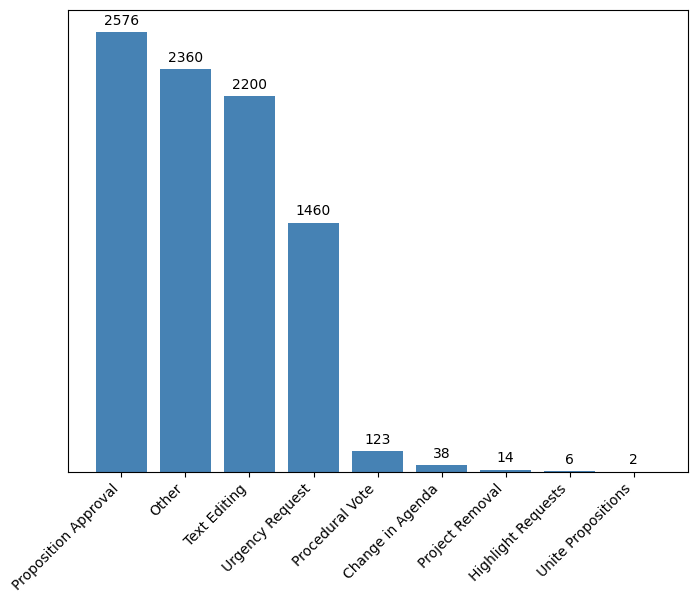

In [38]:
# Calculate counts for each category
category_counts = voting_plen_selected_df['category'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot
bars = ax.bar(category_counts.index, category_counts.values, color='steelblue')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count above it
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}',                      # Text to display
        xy=(bar.get_x() + bar.get_width()/2, height),  # Position at the center top of the bar
        xytext=(0, 3),                         # Offset the text by 3 points vertically
        textcoords="offset points",
        ha='center', va='bottom'
    )

# Remove the y-axis and grid lines
ax.get_yaxis().set_visible(False)
ax.grid(False)

plt.show()

In [39]:
voting_plen_selected_df[(voting_plen_selected_df['category']=='Proposition Approval')]

,idVotacao,siglaOrgao,aprovacao,votosSim,votosNao,votosOutros,descricao,year,nomeOrgao,tipoOrgao,proposicao_id,proposicao_titulo,proposicao_ementa,proposicao_siglaTipo,proposicao_ano,proposicao_ano_arquivo,has_votes,category,detected_phrase
1,96076-49,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,96076.0,PL 7262/2002,Dispõe sobre o Estatuto de Defesa do Torcedor ...,PL,2002.0,2003.0,False,Proposition Approval,aprovada a redação
42,90170-25,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,90170.0,PL 7241/2002,Dispõe sobre a alienação por doação de uma Cor...,PL,2002.0,2003.0,False,Proposition Approval,aprovada a redação
47,90170-23,PLEN,1,0,0,0,Aprovado o Projeto de Lei,2003,Plenário,Plenário Virtual,90170.0,PL 7241/2002,Dispõe sobre a alienação por doação de uma Cor...,PL,2002.0,2003.0,False,Proposition Approval,aprovado o projeto
357,18480-65,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,18480.0,PL 2681/1996,Dá nova redação aos §§ 1º e 3º do art. 184 e a...,PL,1996.0,2003.0,False,Proposition Approval,aprovada a redação
359,19701-54,PLEN,1,0,0,0,Aprovada a Redação Final oferecida pelo Relato...,2003,Plenário,Plenário Virtual,19701.0,PL 3462/2000,Anistia os trabalhadores da Empresa Brasileira...,PL,2000.0,2003.0,False,Proposition Approval,aprovada a redação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157117,2269745-148,PLEN,1,0,0,0,Aprovada a Redação Final assinada pela relator...,2024,Plenário,Plenário Virtual,2269745.0,PL 327/2021,Dispõe sobre a Política Nacional da Transição ...,PL,2021.0,2024.0,False,Proposition Approval,aprovada a redação
157149,2473375-78,PLEN,1,277,174,2,Mantido o texto. Sim: 277; Não: 174; Abstenção...,2024,Plenário,Plenário Virtual,2473375.0,PL 4614/2024,"Altera a Lei nº 8.171, de 17 de janeiro de 199...",PL,2024.0,2024.0,True,Proposition Approval,mantido o texto
157150,2473375-80,PLEN,1,0,0,0,Aprovada a Redação Final assinada pelo relator...,2024,Plenário,Plenário Virtual,2473375.0,PL 4614/2024,"Altera a Lei nº 8.171, de 17 de janeiro de 199...",PL,2024.0,2024.0,False,Proposition Approval,aprovada a redação
157152,2460010-43,PLEN,1,340,117,2,"Aprovado o Projeto de Lei nº 3.802, de 2024. S...",2024,Plenário,Plenário Virtual,2460010.0,PL 3802/2024,"Altera a Lei nº 14.467, de 16 de novembro de 2...",PL,2024.0,2024.0,True,Proposition Approval,aprovado o projeto


# LLM Classification

In [40]:
# Load API key from environment or .env file
load_dotenv()
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    raise ValueError("API Key is missing. Set the 'GROQ_API_KEY' as an environment variable or in a .env file.")

In [41]:
# Initialize Groq client
client = Groq(api_key=api_key)

In [42]:
# Define categories
CATEGORIES = [
    "Aprovação do texto ou redação final",
    "edição ou substitutivo de texto",
    "requerimento de mudança de agenda",
    "requerimento de urgência",
    "remoção do projeto",
    "requerimento de destaque",
    "apensação de projeto",
    "outros"
]

In [43]:
# Load your dataset
df = voting_plen_selected_df  # Assuming it is already loaded in memory

In [46]:
# Ensure the column 'descricao' exists
if 'descricao' not in df.columns:
    raise ValueError("Column 'descricao' not found in the dataset.")

# Define batch size
BATCH_SIZE = 100  
total_samples = len(df)
num_batches = (total_samples // BATCH_SIZE) + (1 if total_samples % BATCH_SIZE != 0 else 0)

print(f"Loaded dataset with {total_samples} rows. Processing in {num_batches} batches of {BATCH_SIZE} rows each.")

# Function to classify a single text
def classify_text(text, index, total):
    prompt = (
        "Classify the following Brazilian congressional voting description into one of these predefined categories, "
        "based solely on the type of legislative action. Respond ONLY with the category name, no explanations or additional text.\n\n"
        "Categories:\n"
        "- Approval of Requests (e.g., request for urgency, highlight, postponement, etc.)\n"
        "- Change in Processing Regime\n"
        "- Approval of Substitutes (e.g., Senate amendments, alternative versions of bills)\n"
        "- Approval of Final Wording (last version before becoming law)\n"
        "- Approval of Appeals (e.g., reconsideration requests)\n"
        "- Other Legislative Actions (if none of the above apply)\n\n"
        f"Text: {text}\n"
        "Category:"
    )

    messages = [{"role": "user", "content": prompt}]

    try:
        response = client.chat.completions.create(
            model="llama3-70b-8192",
            messages=messages,
            temperature=0.2,  # Lower temperature for more deterministic classification
            max_completion_tokens=10,  # Ensure the response is just the category name
            top_p=1,
            stream=False,
            stop=None,
        )

        # Extract classification result
        classification = response.choices[0].message.content.strip()

        # Ensure the output is a valid category
        VALID_CATEGORIES = [
            "Approval of Requests",
            "Change in Processing Regime",
            "Approval of Substitutes",
            "Approval of Final Wording",
            "Approval of Appeals",
            "Other Legislative Actions"
        ]
        
        if classification not in VALID_CATEGORIES:
            print(f"[Warning] Unexpected classification output at index {index}: {classification}")
            classification = "Other Legislative Actions"  # Default to fallback category

        return classification

    except Exception as e:
        print(f"Error processing text at index {index}: {e}")
        return "Error"

# Process and save in batches
for batch_num in range(num_batches):
    start_idx = batch_num * BATCH_SIZE
    end_idx = min(start_idx + BATCH_SIZE, total_samples)
    df_batch = df.iloc[start_idx:end_idx].copy()

    print(f"\n🔄 Processing batch {batch_num+1}/{num_batches} ({start_idx} to {end_idx-1})...")

    df_batch["classification"] = [
        classify_text(text, idx, total_samples) if pd.notna(text) else "No text"
        for idx, text in tqdm(enumerate(df_batch["descricao"], start=start_idx), total=len(df_batch), desc="Processing")
    ]

    # Save batch to CSV
    output_file = f"classified_voting_texts_batch_{batch_num+1}.csv"
    df_batch.to_csv(output_file, index=False, encoding="utf-8")

    print(f"\n✅ Batch {batch_num+1} completed! File saved as {output_file}.")

print("\n🎉 All batches processed successfully!")

Loaded dataset with 8779 rows. Processing in 88 batches of 100 rows each.

🔄 Processing batch 1/88 (0 to 99)...


Processing: 100%|██████████| 100/100 [03:27<00:00,  2.07s/it]



✅ Batch 1 completed! File saved as classified_voting_texts_batch_1.csv.

🔄 Processing batch 2/88 (100 to 199)...


Processing:  87%|████████▋ | 87/100 [02:57<01:00,  4.62s/it]

Error processing text at index 186: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}


Processing: 100%|██████████| 100/100 [03:24<00:00,  2.04s/it]



✅ Batch 2 completed! File saved as classified_voting_texts_batch_2.csv.

🔄 Processing batch 3/88 (200 to 299)...


Processing:  93%|█████████▎| 93/100 [02:43<00:02,  2.43it/s]

[Warning] Unexpected classification output at index 292: Rejection of Requests


Processing: 100%|██████████| 100/100 [02:45<00:00,  1.66s/it]



✅ Batch 3 completed! File saved as classified_voting_texts_batch_3.csv.

🔄 Processing batch 4/88 (300 to 399)...


Processing: 100%|██████████| 100/100 [03:07<00:00,  1.88s/it]



✅ Batch 4 completed! File saved as classified_voting_texts_batch_4.csv.

🔄 Processing batch 5/88 (400 to 499)...


Processing: 100%|██████████| 100/100 [04:22<00:00,  2.62s/it]



✅ Batch 5 completed! File saved as classified_voting_texts_batch_5.csv.

🔄 Processing batch 6/88 (500 to 599)...


Processing: 100%|██████████| 100/100 [04:20<00:00,  2.61s/it]



✅ Batch 6 completed! File saved as classified_voting_texts_batch_6.csv.

🔄 Processing batch 7/88 (600 to 699)...


Processing: 100%|██████████| 100/100 [04:18<00:00,  2.59s/it]



✅ Batch 7 completed! File saved as classified_voting_texts_batch_7.csv.

🔄 Processing batch 8/88 (700 to 799)...


Processing: 100%|██████████| 100/100 [04:19<00:00,  2.59s/it]



✅ Batch 8 completed! File saved as classified_voting_texts_batch_8.csv.

🔄 Processing batch 9/88 (800 to 899)...


Processing: 100%|██████████| 100/100 [04:21<00:00,  2.61s/it]



✅ Batch 9 completed! File saved as classified_voting_texts_batch_9.csv.

🔄 Processing batch 10/88 (900 to 999)...


Processing: 100%|██████████| 100/100 [04:21<00:00,  2.62s/it]



✅ Batch 10 completed! File saved as classified_voting_texts_batch_10.csv.

🔄 Processing batch 11/88 (1000 to 1099)...


Processing:  15%|█▌        | 15/100 [00:40<04:09,  2.93s/it]

[Warning] Unexpected classification output at index 1014: Rejection of a Bill


Processing: 100%|██████████| 100/100 [02:38<00:00,  1.59s/it]



✅ Batch 11 completed! File saved as classified_voting_texts_batch_11.csv.

🔄 Processing batch 12/88 (1100 to 1199)...


Processing: 100%|██████████| 100/100 [03:49<00:00,  2.30s/it]



✅ Batch 12 completed! File saved as classified_voting_texts_batch_12.csv.

🔄 Processing batch 13/88 (1200 to 1299)...


Processing: 100%|██████████| 100/100 [02:19<00:00,  1.40s/it]



✅ Batch 13 completed! File saved as classified_voting_texts_batch_13.csv.

🔄 Processing batch 14/88 (1300 to 1399)...


Processing: 100%|██████████| 100/100 [03:08<00:00,  1.89s/it]



✅ Batch 14 completed! File saved as classified_voting_texts_batch_14.csv.

🔄 Processing batch 15/88 (1400 to 1499)...


Processing: 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]



✅ Batch 15 completed! File saved as classified_voting_texts_batch_15.csv.

🔄 Processing batch 16/88 (1500 to 1599)...


Processing: 100%|██████████| 100/100 [03:02<00:00,  1.82s/it]



✅ Batch 16 completed! File saved as classified_voting_texts_batch_16.csv.

🔄 Processing batch 17/88 (1600 to 1699)...


Processing: 100%|██████████| 100/100 [03:50<00:00,  2.31s/it]



✅ Batch 17 completed! File saved as classified_voting_texts_batch_17.csv.

🔄 Processing batch 18/88 (1700 to 1799)...


Processing: 100%|██████████| 100/100 [02:31<00:00,  1.51s/it]



✅ Batch 18 completed! File saved as classified_voting_texts_batch_18.csv.

🔄 Processing batch 19/88 (1800 to 1899)...


Processing: 100%|██████████| 100/100 [04:18<00:00,  2.58s/it]



✅ Batch 19 completed! File saved as classified_voting_texts_batch_19.csv.

🔄 Processing batch 20/88 (1900 to 1999)...


Processing: 100%|██████████| 100/100 [08:49<00:00,  5.30s/it]



✅ Batch 20 completed! File saved as classified_voting_texts_batch_20.csv.

🔄 Processing batch 21/88 (2000 to 2099)...


Processing:  94%|█████████▍| 94/100 [10:44<00:02,  2.97it/s] 

[Warning] Unexpected classification output at index 2093: Rejection of Amendments


Processing: 100%|██████████| 100/100 [10:52<00:00,  6.53s/it]



✅ Batch 21 completed! File saved as classified_voting_texts_batch_21.csv.

🔄 Processing batch 22/88 (2100 to 2199)...


Processing: 100%|██████████| 100/100 [07:19<00:00,  4.40s/it]



✅ Batch 22 completed! File saved as classified_voting_texts_batch_22.csv.

🔄 Processing batch 23/88 (2200 to 2299)...


Processing:  69%|██████▉   | 69/100 [12:58<11:56, 23.10s/it] 

Error processing text at index 2268: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 500028, Requested 334. Please try again in 1m2.642199999s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing:  70%|███████   | 70/100 [12:58<08:07, 16.25s/it]

Error processing text at index 2269: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 500027, Requested 398. Please try again in 1m13.4424s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [18:57<00:00, 11.38s/it]



✅ Batch 23 completed! File saved as classified_voting_texts_batch_23.csv.

🔄 Processing batch 24/88 (2300 to 2399)...


Processing: 100%|██████████| 100/100 [04:44<00:00,  2.85s/it]



✅ Batch 24 completed! File saved as classified_voting_texts_batch_24.csv.

🔄 Processing batch 25/88 (2400 to 2499)...


Processing: 100%|██████████| 100/100 [10:05<00:00,  6.05s/it]



✅ Batch 25 completed! File saved as classified_voting_texts_batch_25.csv.

🔄 Processing batch 26/88 (2500 to 2599)...


Processing: 100%|██████████| 100/100 [25:23<00:00, 15.23s/it]



✅ Batch 26 completed! File saved as classified_voting_texts_batch_26.csv.

🔄 Processing batch 27/88 (2600 to 2699)...


Processing: 100%|██████████| 100/100 [04:15<00:00,  2.55s/it]



✅ Batch 27 completed! File saved as classified_voting_texts_batch_27.csv.

🔄 Processing batch 28/88 (2700 to 2799)...


Processing:  34%|███▍      | 34/100 [02:21<13:24, 12.19s/it]

Error processing text at index 2733: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499986, Requested 400. Please try again in 1m6.5696s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [14:49<00:00,  8.90s/it]



✅ Batch 28 completed! File saved as classified_voting_texts_batch_28.csv.

🔄 Processing batch 29/88 (2800 to 2899)...


Processing:  58%|█████▊    | 58/100 [03:04<08:18, 11.87s/it]

Error processing text at index 2857: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499987, Requested 564. Please try again in 1m35.1296s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [05:34<00:00,  3.34s/it]



✅ Batch 29 completed! File saved as classified_voting_texts_batch_29.csv.

🔄 Processing batch 30/88 (2900 to 2999)...


Processing:  57%|█████▋    | 57/100 [05:03<13:24, 18.70s/it]

Error processing text at index 2956: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499979, Requested 475. Please try again in 1m18.304s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing:  72%|███████▏  | 72/100 [12:07<09:09, 19.62s/it]

Error processing text at index 2971: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499976, Requested 843. Please try again in 2m21.509799999s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [13:07<00:00,  7.87s/it]



✅ Batch 30 completed! File saved as classified_voting_texts_batch_30.csv.

🔄 Processing batch 31/88 (3000 to 3099)...


Processing:  93%|█████████▎| 93/100 [17:16<02:16, 19.48s/it]

Error processing text at index 3092: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499985, Requested 618. Please try again in 1m44.112199999s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [20:09<00:00, 12.10s/it]



✅ Batch 31 completed! File saved as classified_voting_texts_batch_31.csv.

🔄 Processing batch 32/88 (3100 to 3199)...


Processing: 100%|██████████| 100/100 [15:04<00:00,  9.05s/it]



✅ Batch 32 completed! File saved as classified_voting_texts_batch_32.csv.

🔄 Processing batch 33/88 (3200 to 3299)...


Processing: 100%|██████████| 100/100 [08:08<00:00,  4.88s/it]



✅ Batch 33 completed! File saved as classified_voting_texts_batch_33.csv.

🔄 Processing batch 34/88 (3300 to 3399)...


Processing: 100%|██████████| 100/100 [07:33<00:00,  4.53s/it]



✅ Batch 34 completed! File saved as classified_voting_texts_batch_34.csv.

🔄 Processing batch 35/88 (3400 to 3499)...


Processing: 100%|██████████| 100/100 [05:52<00:00,  3.53s/it]



✅ Batch 35 completed! File saved as classified_voting_texts_batch_35.csv.

🔄 Processing batch 36/88 (3500 to 3599)...


Processing: 100%|██████████| 100/100 [13:16<00:00,  7.96s/it]



✅ Batch 36 completed! File saved as classified_voting_texts_batch_36.csv.

🔄 Processing batch 37/88 (3600 to 3699)...


Processing: 100%|██████████| 100/100 [06:34<00:00,  3.95s/it]



✅ Batch 37 completed! File saved as classified_voting_texts_batch_37.csv.

🔄 Processing batch 38/88 (3700 to 3799)...


Processing: 100%|██████████| 100/100 [13:06<00:00,  7.87s/it]



✅ Batch 38 completed! File saved as classified_voting_texts_batch_38.csv.

🔄 Processing batch 39/88 (3800 to 3899)...


Processing: 100%|██████████| 100/100 [30:14<00:00, 18.14s/it]



✅ Batch 39 completed! File saved as classified_voting_texts_batch_39.csv.

🔄 Processing batch 40/88 (3900 to 3999)...


Processing:  54%|█████▍    | 54/100 [04:13<04:12,  5.48s/it]

Error processing text at index 3953: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}


Processing: 100%|██████████| 100/100 [19:23<00:00, 11.63s/it]



✅ Batch 40 completed! File saved as classified_voting_texts_batch_40.csv.

🔄 Processing batch 41/88 (4000 to 4099)...


Processing: 100%|██████████| 100/100 [05:54<00:00,  3.54s/it]



✅ Batch 41 completed! File saved as classified_voting_texts_batch_41.csv.

🔄 Processing batch 42/88 (4100 to 4199)...


Processing: 100%|██████████| 100/100 [07:15<00:00,  4.35s/it]



✅ Batch 42 completed! File saved as classified_voting_texts_batch_42.csv.

🔄 Processing batch 43/88 (4200 to 4299)...


Processing:  54%|█████▍    | 54/100 [07:23<00:13,  3.38it/s]

[Warning] Unexpected classification output at index 4253: Rejection of Amendments


Processing: 100%|██████████| 100/100 [20:31<00:00, 12.32s/it]



✅ Batch 43 completed! File saved as classified_voting_texts_batch_43.csv.

🔄 Processing batch 44/88 (4300 to 4399)...


Processing: 100%|██████████| 100/100 [08:07<00:00,  4.87s/it]



✅ Batch 44 completed! File saved as classified_voting_texts_batch_44.csv.

🔄 Processing batch 45/88 (4400 to 4499)...


Processing:  20%|██        | 20/100 [08:57<23:25, 17.57s/it]

Error processing text at index 4419: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}


Processing:  31%|███       | 31/100 [10:57<26:53, 23.39s/it]

Error processing text at index 4430: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}


Processing:  60%|██████    | 60/100 [24:11<13:49, 20.73s/it]

Error processing text at index 4459: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499975, Requested 407. Please try again in 1m5.9264s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [40:30<00:00, 24.30s/it]



✅ Batch 45 completed! File saved as classified_voting_texts_batch_45.csv.

🔄 Processing batch 46/88 (4500 to 4599)...


Processing: 100%|██████████| 100/100 [30:29<00:00, 18.30s/it]



✅ Batch 46 completed! File saved as classified_voting_texts_batch_46.csv.

🔄 Processing batch 47/88 (4600 to 4699)...


Processing: 100%|██████████| 100/100 [16:59<00:00, 10.20s/it]



✅ Batch 47 completed! File saved as classified_voting_texts_batch_47.csv.

🔄 Processing batch 48/88 (4700 to 4799)...


Processing: 100%|██████████| 100/100 [25:04<00:00, 15.04s/it]



✅ Batch 48 completed! File saved as classified_voting_texts_batch_48.csv.

🔄 Processing batch 49/88 (4800 to 4899)...


Processing: 100%|██████████| 100/100 [16:00<00:00,  9.61s/it]



✅ Batch 49 completed! File saved as classified_voting_texts_batch_49.csv.

🔄 Processing batch 50/88 (4900 to 4999)...


Processing: 100%|██████████| 100/100 [26:01<00:00, 15.62s/it]



✅ Batch 50 completed! File saved as classified_voting_texts_batch_50.csv.

🔄 Processing batch 51/88 (5000 to 5099)...


Processing: 100%|██████████| 100/100 [21:47<00:00, 13.07s/it]



✅ Batch 51 completed! File saved as classified_voting_texts_batch_51.csv.

🔄 Processing batch 52/88 (5100 to 5199)...


Processing: 100%|██████████| 100/100 [11:20<00:00,  6.81s/it]



✅ Batch 52 completed! File saved as classified_voting_texts_batch_52.csv.

🔄 Processing batch 53/88 (5200 to 5299)...


Processing: 100%|██████████| 100/100 [08:07<00:00,  4.88s/it]



✅ Batch 53 completed! File saved as classified_voting_texts_batch_53.csv.

🔄 Processing batch 54/88 (5300 to 5399)...


Processing:  51%|█████     | 51/100 [07:40<16:21, 20.03s/it]

Error processing text at index 5350: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01jkqbt2jkezq8xc0dsgkgkx7b` service tier `on_demand` on : Limit 500000, Used 499979, Requested 395. Please try again in 1m4.553s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}


Processing: 100%|██████████| 100/100 [31:30<00:00, 18.90s/it]



✅ Batch 54 completed! File saved as classified_voting_texts_batch_54.csv.

🔄 Processing batch 55/88 (5400 to 5499)...


Processing: 100%|██████████| 100/100 [16:56<00:00, 10.17s/it]



✅ Batch 55 completed! File saved as classified_voting_texts_batch_55.csv.

🔄 Processing batch 56/88 (5500 to 5599)...


Processing: 100%|██████████| 100/100 [14:07<00:00,  8.48s/it]



✅ Batch 56 completed! File saved as classified_voting_texts_batch_56.csv.

🔄 Processing batch 57/88 (5600 to 5699)...


Processing: 100%|██████████| 100/100 [29:05<00:00, 17.45s/it]



✅ Batch 57 completed! File saved as classified_voting_texts_batch_57.csv.

🔄 Processing batch 58/88 (5700 to 5799)...


Processing: 100%|██████████| 100/100 [26:17<00:00, 15.77s/it]



✅ Batch 58 completed! File saved as classified_voting_texts_batch_58.csv.

🔄 Processing batch 59/88 (5800 to 5899)...


Processing: 100%|██████████| 100/100 [06:09<00:00,  3.69s/it]



✅ Batch 59 completed! File saved as classified_voting_texts_batch_59.csv.

🔄 Processing batch 60/88 (5900 to 5999)...


Processing: 100%|██████████| 100/100 [12:45<00:00,  7.65s/it]



✅ Batch 60 completed! File saved as classified_voting_texts_batch_60.csv.

🔄 Processing batch 61/88 (6000 to 6099)...


Processing: 100%|██████████| 100/100 [20:26<00:00, 12.27s/it]



✅ Batch 61 completed! File saved as classified_voting_texts_batch_61.csv.

🔄 Processing batch 62/88 (6100 to 6199)...


Processing: 100%|██████████| 100/100 [21:46<00:00, 13.07s/it]



✅ Batch 62 completed! File saved as classified_voting_texts_batch_62.csv.

🔄 Processing batch 63/88 (6200 to 6299)...


Processing: 100%|██████████| 100/100 [12:50<00:00,  7.70s/it]



✅ Batch 63 completed! File saved as classified_voting_texts_batch_63.csv.

🔄 Processing batch 64/88 (6300 to 6399)...


Processing: 100%|██████████| 100/100 [05:35<00:00,  3.36s/it]



✅ Batch 64 completed! File saved as classified_voting_texts_batch_64.csv.

🔄 Processing batch 65/88 (6400 to 6499)...


Processing: 100%|██████████| 100/100 [15:10<00:00,  9.11s/it]



✅ Batch 65 completed! File saved as classified_voting_texts_batch_65.csv.

🔄 Processing batch 66/88 (6500 to 6599)...


Processing: 100%|██████████| 100/100 [03:35<00:00,  2.16s/it]



✅ Batch 66 completed! File saved as classified_voting_texts_batch_66.csv.

🔄 Processing batch 67/88 (6600 to 6699)...


Processing: 100%|██████████| 100/100 [19:41<00:00, 11.82s/it]



✅ Batch 67 completed! File saved as classified_voting_texts_batch_67.csv.

🔄 Processing batch 68/88 (6700 to 6799)...


Processing: 100%|██████████| 100/100 [21:14<00:00, 12.74s/it]



✅ Batch 68 completed! File saved as classified_voting_texts_batch_68.csv.

🔄 Processing batch 69/88 (6800 to 6899)...


Processing: 100%|██████████| 100/100 [14:49<00:00,  8.89s/it]



✅ Batch 69 completed! File saved as classified_voting_texts_batch_69.csv.

🔄 Processing batch 70/88 (6900 to 6999)...


Processing: 100%|██████████| 100/100 [22:35<00:00, 13.56s/it]



✅ Batch 70 completed! File saved as classified_voting_texts_batch_70.csv.

🔄 Processing batch 71/88 (7000 to 7099)...


Processing: 100%|██████████| 100/100 [08:01<00:00,  4.82s/it]



✅ Batch 71 completed! File saved as classified_voting_texts_batch_71.csv.

🔄 Processing batch 72/88 (7100 to 7199)...


Processing: 100%|██████████| 100/100 [29:34<00:00, 17.75s/it]



✅ Batch 72 completed! File saved as classified_voting_texts_batch_72.csv.

🔄 Processing batch 73/88 (7200 to 7299)...


Processing: 100%|██████████| 100/100 [14:00<00:00,  8.41s/it]



✅ Batch 73 completed! File saved as classified_voting_texts_batch_73.csv.

🔄 Processing batch 74/88 (7300 to 7399)...


Processing: 100%|██████████| 100/100 [22:26<00:00, 13.46s/it]



✅ Batch 74 completed! File saved as classified_voting_texts_batch_74.csv.

🔄 Processing batch 75/88 (7400 to 7499)...


Processing: 100%|██████████| 100/100 [05:22<00:00,  3.23s/it]



✅ Batch 75 completed! File saved as classified_voting_texts_batch_75.csv.

🔄 Processing batch 76/88 (7500 to 7599)...


Processing: 100%|██████████| 100/100 [08:40<00:00,  5.21s/it]



✅ Batch 76 completed! File saved as classified_voting_texts_batch_76.csv.

🔄 Processing batch 77/88 (7600 to 7699)...


Processing: 100%|██████████| 100/100 [07:12<00:00,  4.33s/it]



✅ Batch 77 completed! File saved as classified_voting_texts_batch_77.csv.

🔄 Processing batch 78/88 (7700 to 7799)...


Processing: 100%|██████████| 100/100 [37:09<00:00, 22.29s/it]



✅ Batch 78 completed! File saved as classified_voting_texts_batch_78.csv.

🔄 Processing batch 79/88 (7800 to 7899)...


Processing: 100%|██████████| 100/100 [11:39<00:00,  7.00s/it]



✅ Batch 79 completed! File saved as classified_voting_texts_batch_79.csv.

🔄 Processing batch 80/88 (7900 to 7999)...


Processing: 100%|██████████| 100/100 [16:49<00:00, 10.09s/it]



✅ Batch 80 completed! File saved as classified_voting_texts_batch_80.csv.

🔄 Processing batch 81/88 (8000 to 8099)...


Processing:  21%|██        | 21/100 [01:34<00:26,  2.94it/s]

[Warning] Unexpected classification output at index 8020: Rejection of Amendments


Processing: 100%|██████████| 100/100 [05:03<00:00,  3.04s/it]



✅ Batch 81 completed! File saved as classified_voting_texts_batch_81.csv.

🔄 Processing batch 82/88 (8100 to 8199)...


Processing:  52%|█████▏    | 52/100 [06:42<24:25, 30.52s/it]

[Warning] Unexpected classification output at index 8151: Rejection of Amendments


Processing: 100%|██████████| 100/100 [13:57<00:00,  8.38s/it]



✅ Batch 82 completed! File saved as classified_voting_texts_batch_82.csv.

🔄 Processing batch 83/88 (8200 to 8299)...


Processing:   7%|▋         | 7/100 [00:17<03:49,  2.47s/it]

[Warning] Unexpected classification output at index 8206: Rejection of Amendments


Processing: 100%|██████████| 100/100 [13:17<00:00,  7.97s/it]



✅ Batch 83 completed! File saved as classified_voting_texts_batch_83.csv.

🔄 Processing batch 84/88 (8300 to 8399)...


Processing: 100%|██████████| 100/100 [07:07<00:00,  4.27s/it]



✅ Batch 84 completed! File saved as classified_voting_texts_batch_84.csv.

🔄 Processing batch 85/88 (8400 to 8499)...


Processing: 100%|██████████| 100/100 [19:58<00:00, 11.99s/it]



✅ Batch 85 completed! File saved as classified_voting_texts_batch_85.csv.

🔄 Processing batch 86/88 (8500 to 8599)...


Processing: 100%|██████████| 100/100 [08:49<00:00,  5.30s/it]



✅ Batch 86 completed! File saved as classified_voting_texts_batch_86.csv.

🔄 Processing batch 87/88 (8600 to 8699)...


Processing: 100%|██████████| 100/100 [21:19<00:00, 12.79s/it]



✅ Batch 87 completed! File saved as classified_voting_texts_batch_87.csv.

🔄 Processing batch 88/88 (8700 to 8778)...


Processing: 100%|██████████| 79/79 [28:42<00:00, 21.81s/it]



✅ Batch 88 completed! File saved as classified_voting_texts_batch_88.csv.

🎉 All batches processed successfully!
